<a href="https://colab.research.google.com/github/polaroidz/polaroidz/blob/main/Experimental_Design_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

data(ToothGrowth)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
glimpse(ToothGrowth)

Rows: 60
Columns: 3
$ len  <dbl> 4.2, 11.5, 7.3, 5.8, 6.4, 10.0, 11.2, 11.2, 5.2, 7.0, 16.5, 16.5,…
$ supp <fct> VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, VC, V…
$ dose <dbl> 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, …


In [ ]:
# Perform a two-sided t-test
t.test(x = ToothGrowth$len, alternative = "two.sided", mu = 18)


	One Sample t-test

data:  ToothGrowth$len
t = 0.82361, df = 59, p-value = 0.4135
alternative hypothesis: true mean is not equal to 18
95 percent confidence interval:
 16.83731 20.78936
sample estimates:
mean of x 
 18.81333 


In [ ]:
# Perform a t-test
ToothGrowth_ttest <- t.test(len ~ supp, data = ToothGrowth)

# Load broom
library(broom)

# Tidy ToothGrowth_ttest
tidy(ToothGrowth_ttest)

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3.7,20.66333,16.96333,1.915268,0.06063451,55.30943,-0.1710156,7.571016,Welch Two Sample t-test,two.sided


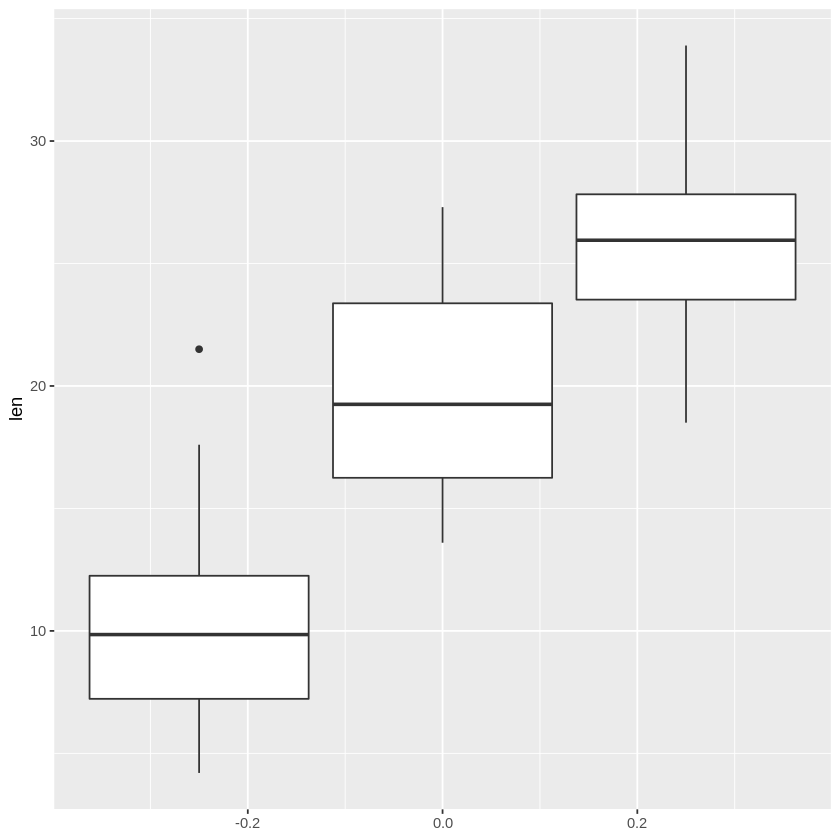

In [ ]:
# Create a boxplot with geom_boxplot()
ggplot(ToothGrowth, aes(group = dose, y = len)) + 
    geom_boxplot() 

In [ ]:
# Create ToothGrowth_aov
ToothGrowth_aov <- aov(len ~ dose + supp, data = ToothGrowth)

# Examine ToothGrowth_aov with summary()
summary(ToothGrowth_aov)


            Df Sum Sq Mean Sq F value   Pr(>F)    
dose         1 2224.3  2224.3  123.99 6.31e-16 ***
supp         1  205.4   205.4   11.45   0.0013 ** 
Residuals   57 1022.6    17.9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
library(pwr)

ERROR: ignored

In [ ]:
pwr.anova.test(
  k = 3,
  n = 20,
  f = 0.2,
  sig.level = 0.05,
  power = NULL
)

ERROR: ignored

In [ ]:
# Load the pwr package
library(pwr)

# Calculate power
pwr.t.test(n = 100, 
           d = 0.35,
           sig.level = 0.10,
           type = "two.sample", 
           alternative = "two.sided",
           power = NULL)

In [ ]:
# Load the pwr package
library(pwr)

# Calculate power
pwr.t.test(n = NULL, 
           d = 0.35,
           sig.level = 0.10,
           type = "two.sample", 
           alternative = "two.sided",
           power = 0.2)

In [ ]:
df <- read.csv(url("https://assets.datacamp.com/production/repositories/1793/datasets/e14dbe91a0840393e86e4fb9a7ec1b958842ae39/lendclub.csv"))

In [ ]:
glimpse(df)

Rows: 1,500
Columns: 12
$ member_id           <int> 55096114, 1555332, 1009151, 69524202, 72128084, 53…
$ loan_amnt           <int> 11000, 10000, 13000, 5000, 18000, 14000, 8000, 500…
$ funded_amnt         <int> 11000, 10000, 13000, 5000, 18000, 14000, 8000, 500…
$ term                <chr> "36 months", "36 months", "60 months", "36 months"…
$ int_rate            <dbl> 12.69, 6.62, 10.99, 12.05, 5.32, 16.99, 13.11, 7.8…
$ emp_length          <chr> "10+ years", "10+ years", "3 years", "10+ years", …
$ home_ownership      <chr> "RENT", "MORTGAGE", "MORTGAGE", "MORTGAGE", "MORTG…
$ annual_inc          <dbl> 51000, 40000, 78204, 51000, 96000, 47000, 40000, 3…
$ verification_status <chr> "Not Verified", "Verified", "Not Verified", "Not V…
$ loan_status         <chr> "Current", "Fully Paid", "Fully Paid", "Current", …
$ purpose             <chr> "debt_consolidation", "debt_consolidation", "home_…
$ grade               <chr> "C", "A", "B", "C", "A", "D", "C", "A", "D", "B", …


In [ ]:
# anova

# 1
model <- lm(y ~ x, data = dataset)
anova(model)

# 2
aov(y ~ x, data = dataset)

In [ ]:
# Build a linear regression model, purpose_recode_model
purpose_recode_model <- lm(funded_amnt ~ purpose_recode, data = lendingclub)

# Examine results of purpose_recode_model
summary(purpose_recode_model)

# Get anova results and save as purpose_recode_anova
purpose_recode_anova <- anova(purpose_recode_model)

# Print purpose_recode_anova
summary(purpose_recode_anova)

# Examine class of purpose_recode_anova
class(purpose_recode_anova)

In [ ]:
# Use aov() to build purpose_aov
purpose_aov <- aov(funded_amnt ~ purpose_recode, data = lendingclub)

# Conduct Tukey's HSD test to create tukey_output
tukey_output <- TukeyHSD(purpose_aov)

# Tidy tukey_output to make sense of the results
tidy(tukey_output)

In [ ]:
# Use aov() to build purpose_emp_aov
purpose_emp_aov <- aov(funded_amnt ~ purpose_recode + emp_length, data = lendingclub)

# Print purpose_emp_aov to the console
purpose_emp_aov

# Call summary() to see the p-values
summary(purpose_emp_aov)

In [ ]:
# Examine the summary of int_rate
summary(lendingclub$int_rate)

# Examine int_rate by grade
lendingclub %>% 
	group_by(grade) %>% 
	summarize(mean = mean(int_rate), var = var(int_rate), median = median(int_rate))

# Make a boxplot of int_rate by grade
ggplot(lendingclub, aes(x = grade, y = int_rate)) + 
	geom_boxplot()

# Use aov() to create grade_aov plus call summary() to print results
grade_aov <- aov(int_rate ~ grade, data = lendingclub)
summary(grade_aov)

In [ ]:
# For a 2x2 grid of plots:
par(mfrow = c(2, 2))

# Plot grade_aov
plot(grade_aov)

# Bartlett's test for homogeneity of variance
bartlett.test(int_rate ~ grade, data = lendingclub)

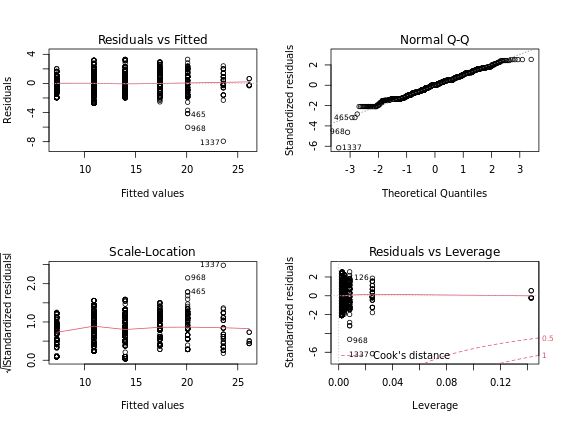

In [ ]:
# Conduct the Kruskal-Wallis rank sum test
kruskal.test(int_rate ~ grade,
             data = lendingclub)

In [ ]:
# Load the pwr package
library(pwr)

# Use the correct function from pwr to find the sample size
pwr.t.test(n = NULL, 
    d = 0.2, 
    power = 0.8, 
    sig.level = 0.05, 
    alternative = c("two.sided"))

In [ ]:
# Plot the A/B test results
ggplot(lendingclub_ab, aes(x = Group, y = loan_amnt)) + 
	geom_boxplot()

# Conduct a two-sided t-test
t.test(loan_amnt ~ Group, data = lendingclub_ab)

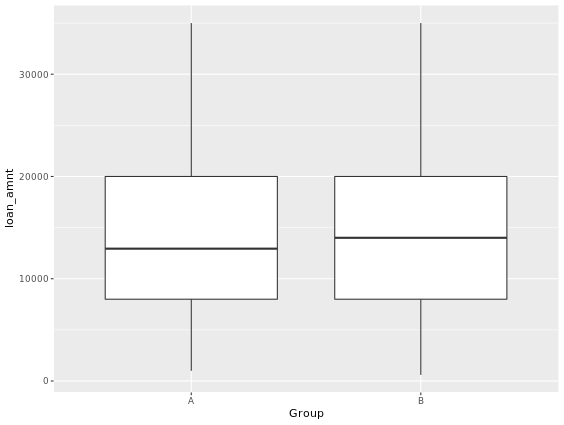

In [ ]:
# Build lendingclub_multi
lendingclub_multi <- lm(loan_amnt ~ Group + grade + verification_status, data = lendingclub_ab)

# Examine lendingclub_multi results
tidy(lendingclub_multi)

In [ ]:
# Load haven
library(haven)

# Import the three datasets using read_xpt()
nhanes_demo <- read_xpt(DEMO_file)
nhanes_medical <- read_xpt(MCQ_file)
nhanes_bodymeasures <- read_xpt(BMX_file)

# Merge the 3 datasets you just created to create nhanes_combined
nhanes_combined <- list(nhanes_demo, nhanes_medical, nhanes_bodymeasures) %>%
  Reduce(function(df1, df2) inner_join(df1, df2, by = "SEQN"), .)

In [ ]:
# Fill in the dplyr code
nhanes_combined %>% 
  group_by(mcq365d) %>% 
  summarize(mean = mean(bmxwt, na.rm = TRUE))

# Fill in the ggplot2 code
nhanes_combined %>% 
  ggplot(aes(as.factor(mcq365d), bmxwt)) +
  geom_boxplot() +
  labs(x = "Treatment",
       y = "Weight")

In [ ]:
# Fill in the dplyr code
nhanes_combined %>% 
  group_by(mcq365d) %>% 
  summarize(mean = mean(bmxwt, na.rm = TRUE))

# Fill in the ggplot2 code
nhanes_combined %>% 
  ggplot(aes(as.factor(mcq365d), bmxwt)) +
  geom_boxplot() +
  labs(x = "Treatment",
       y = "Weight")

In [ ]:
# Use sample_n() to create nhanes_srs
nhanes_srs <- nhanes_final %>% sample_n(2500)

# Create nhanes_stratified with group_by() and sample_n()
nhanes_stratified <- nhanes_final %>% group_by(riagendr) %>% sample_n(2000)
nhanes_stratified %>% 
	count(riagendr)

# Load sampling package and create nhanes_cluster with cluster()
library(sampling)
nhanes_cluster <- cluster(nhanes_final, "indhhin2", 6, method = "srswor")

In [ ]:
# Create designs using ls()
designs <- ls("package:agricolae", pattern = "design")
designs

In [ ]:
# Create designs using ls()
designs <- ls("package:agricolae", pattern = "design")
print(designs)

# Use str() to view design.rcbd's criteria
str(design.rcbd)

# Build treats and rep
treats <- LETTERS[1:5]
blocks <- 4

# Build my_design_rcbd and view the sketch
my_design_rcbd <- design.rcbd(treats, r = blocks, seed = 42)
my_design_rcbd$sketch

In [ ]:
# Use aov() to create nhanes_rcbd
nhanes_rcbd <- aov(bmxwt ~ mcq365d + riagendr, data = nhanes_final)

# Check results of nhanes_rcbd with summary()
summary(nhanes_rcbd)

# Print mean weights by mcq365d and riagendr
nhanes_final %>% 
	group_by(mcq365d, riagendr) %>% 
	summarize(mean_wt = mean(bmxwt, na.rm = TRUE))

In [ ]:
# Run the code to view the interaction plots
with(nhanes_final, interaction.plot(mcq365d, riagendr, bmxwt))

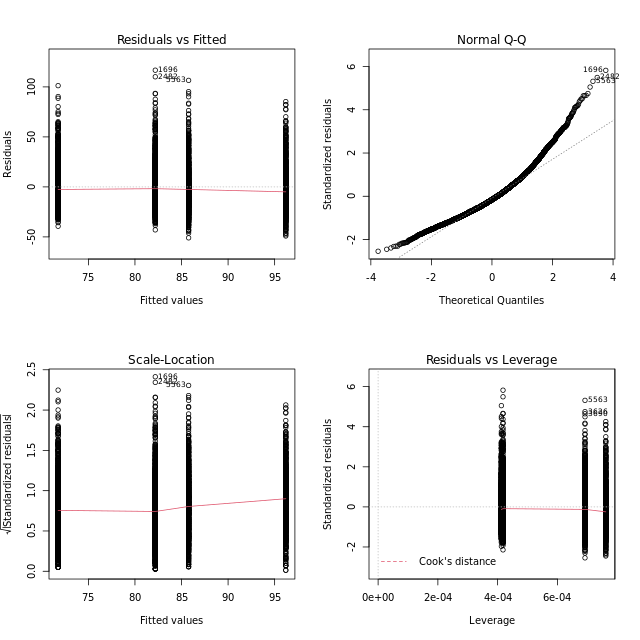

In [ ]:
# Run the code to view the interaction plots
with(nhanes_final, interaction.plot(riagendr, mcq365d, bmxwt))

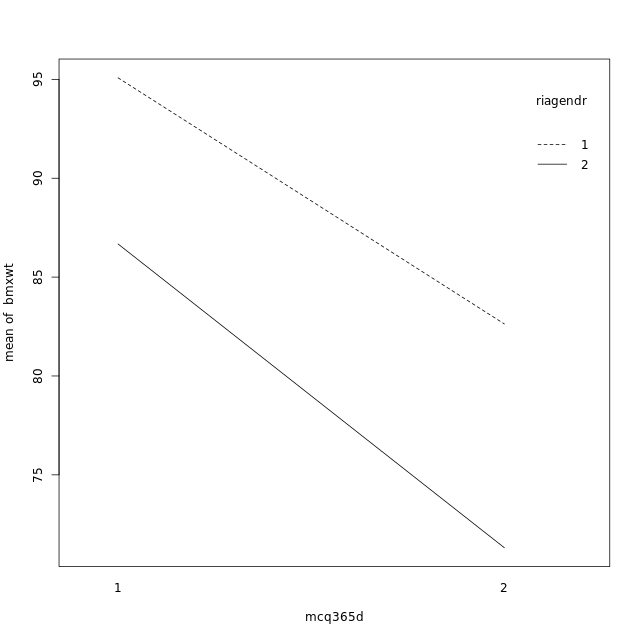